In [1]:
using Pkg
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames
using Statistics


(process:18268): GLib-GIO-WARNING **: 19:14:37.997: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22021.10291.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


#### Zadanie 1
Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

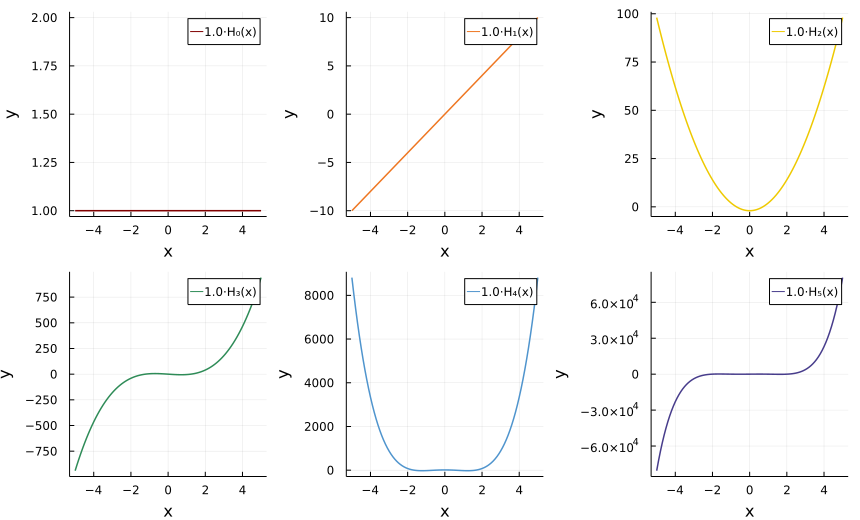

In [2]:
h1 = basis(Hermite, 0)
h2 = basis(Hermite, 1)
h3 = basis(Hermite, 2)
h4 = basis(Hermite, 3)
h5 = basis(Hermite, 4)
h6 = basis(Hermite, 5)

p1 = plot(h1, -5, 5, width=1.5, color=:maroon, xlabel = "x", ylabel = "y")
p2 = plot(h2, -5, 5, width=1.5, color=:chocolate2, xlabel = "x", ylabel = "y")
p3 = plot(h3, -5, 5, width=1.5, color=:gold2, xlabel = "x", ylabel = "y")
p4 = plot(h4, -5, 5, width=1.5, color=:seagreen4, xlabel = "x", ylabel = "y")
p5 = plot(h5, -5, 5, width=1.5, color=:steelblue3, xlabel = "x", ylabel = "y")
p6 = plot(h6, -5, 5, width=1.5, color=:slateblue4, xlabel = "x", ylabel = "y")

plot(p1, p2, p3, p4, p5, p6, layouts=(2,3), size=(860, 520))

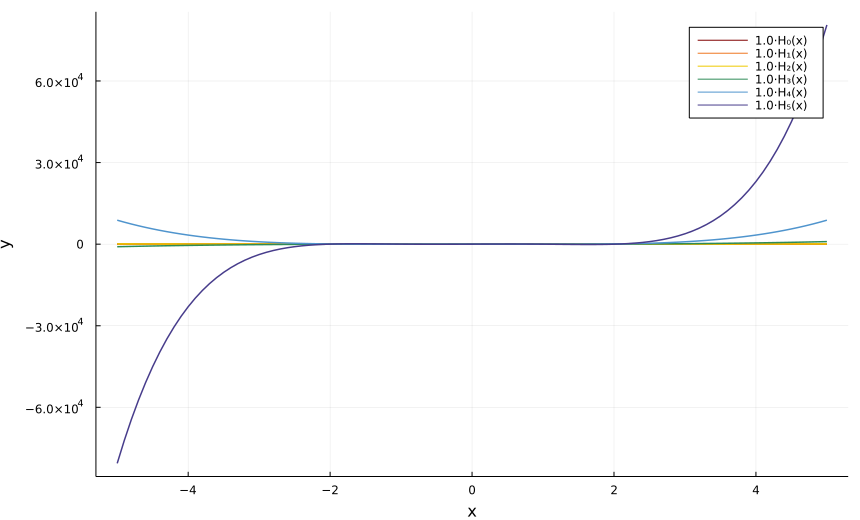

In [3]:
p1 = plot(h1, -5, 5, width=1.5, color=:maroon, size=(860, 520), xlabel = "x", ylabel = "y")
p2 = plot!(h2, -5, 5, width=1.5, color=:chocolate2)
p3 = plot!(h3, -5, 5, width=1.5, color=:gold2)
p4 = plot!(h4, -5, 5, width=1.5, color=:seagreen4)
p5 = plot!(h5, -5, 5, width=1.5, color=:steelblue3)
p6 = plot!(h6, -5, 5, width=1.5, color=:slateblue4)

#### Zadanie 2 / 4
Narysować 6 pierwszych funkcji aproksymujących / Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V. Dane pochodzą z bazy https://www.physionet.org/content/mitdb/1.0.0/ 

In [4]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);

In [5]:
first(ekg_data, 5)

,time,signalN,signalV
,Float64,Float64,Float64
1,-0.1,0.0183886,-0.0990972
2,-0.0972222,0.0145191,-0.0920442
3,-0.0944444,0.012849,-0.0831644
4,-0.0916667,0.0124946,-0.0722728
5,-0.0888889,0.0124117,-0.0593656


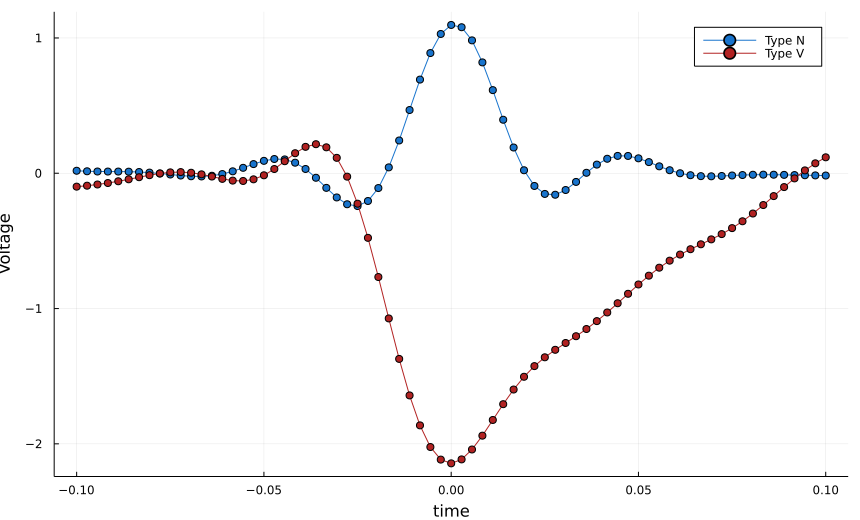

In [6]:
plot(ekg_data.time, ekg_data.signalN, label="Type N", xlabel = "time", ylabel="Voltage", color=:dodgerblue3, 
    size=(860, 520), markershape=:circle)
plot!(ekg_data.time, ekg_data.signalV, label="Type V", color=:firebrick, markershape=:circle)

In [7]:
# Definicja węzłów

xx_ekg = ekg_data.time*40
yy_ekgV = ekg_data.signalV
yy_ekgN = ekg_data.signalN
println()

In [8]:
# obliczamy funkcję bazową - od razu znormalizowaną

function base_fun(n, x)
    H_k = basis(Hermite, n).(x)
    app = H_k .* exp.(-(x.^2)/2)
    
    return normalize(app)
   
end

base_fun (generic function with 1 method)

In [9]:
# tablica na wektory wartości dla n początkowych funkcji bazowych (f0, f1, .., f(n-1))
# dla wartości xx

function fs(n, xx)
    f = []
    for i=1:n
        push!(f, base_fun(i-1, xx))
    end
    return f
end

fs (generic function with 1 method)

In [10]:
# sprawdzenie czy ortonormalne

dot_base = Array{Float64, 2}(undef, 6, 6); 

for (i, f_i) in enumerate(fs(6, xx_ekg)) 
    for (j, f_j) in enumerate(fs(6, xx_ekg))
        dot_base[i,j] = dot(f_i, f_j)
    end
end

In [11]:
dot_base

6×6 Matrix{Float64}:
  1.0           1.66888e-15  -2.25738e-7   …  -1.95686e-6    2.25327e-15
  1.66888e-15   1.0          -1.90693e-15      2.52112e-17  -2.69919e-5
 -2.25738e-7   -1.90693e-15   1.0             -4.73428e-5   -1.33435e-15
 -2.46191e-15  -4.30402e-6   -5.42147e-16     -2.38736e-15  -0.000356628
 -1.95686e-6    2.52112e-17  -4.73428e-5       1.0           2.32295e-15
  2.25327e-15  -2.69919e-5   -1.33435e-15  …   2.32295e-15   1.0

In [12]:
# tablica na n współczynników c0, c1, .., c(n-1) dla wektora wartości yy

function cs(n, f, yy)
    c = []
    for i=1:n
        push!(c, dot(yy, f[i]))
    end
    return c
end

cs (generic function with 1 method)

In [13]:
# wyliczenie wartości aproksymowanych kolejnymi stopniami od 0 do n-1

function apps(n, c, f) 
    app = []
    for i=1:n
        push!(app, c[i]*f[i])
    end
    return app
end

apps (generic function with 1 method)

In [14]:
function apps_complete(n, app)
    comp = []
    push!(comp, app[1])
    for i=1:(n-1)
        push!(comp, comp[i]+app[i+1])
    end
    return comp[n]
end 

apps_complete (generic function with 1 method)

In [15]:
function plot_all(n, xx, yy, appsX, colors, signal, base_col)
    plot(xx_ekg, yy, markershape=:circle, label=signal, width=1.5, color=base_col, size=(860, 520), 
        xlabel = "time", ylabel = "Voltage")
    j = 0
    for i=1:n-1
        plot!(xx_ekg, apps_complete(i, appsX), label="k=$j", width=1.5, color=colors[i])
        j += 1
    end
    plot!(xx_ekg, apps_complete(n, appsX), label="k=$j", width=1.5, color=colors[n])
end

plot_all (generic function with 1 method)

In [16]:
n = 6
# dla sygnału N

# wektory wartości
fN = fs(n, xx_ekg)
# współczynniki
cN = cs(n, fN, yy_ekgN)
# wartości aproksymowane
appsN = apps(n, cN, fN)

# dla sygnału V

fV = fs(n, xx_ekg)
cV = cs(n, fV, yy_ekgV)
appsV = apps(n, cV, fV)

colorsN = palette([:skyblue1, :royalblue4], n)
colorsV = palette([:burlywood2, :firebrick], n)
println()

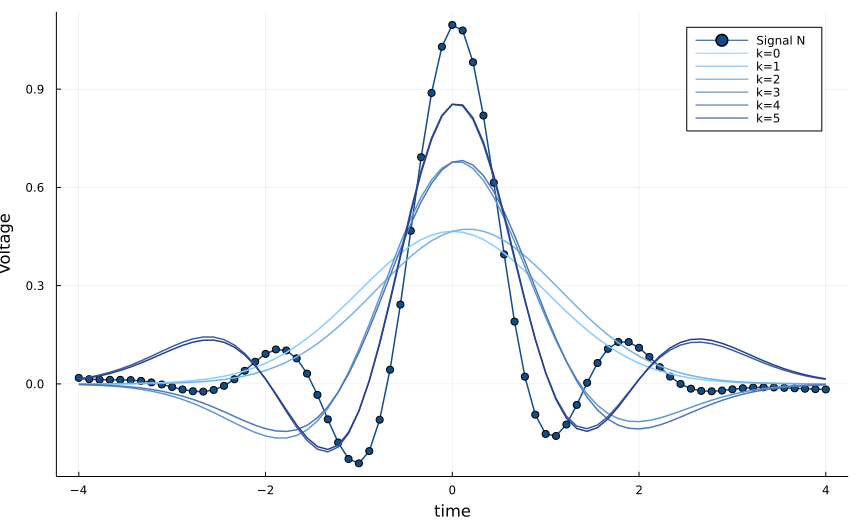

In [17]:
plot_all(n, xx_ekg, yy_ekgN, appsN, colorsN, "Signal N", :dodgerblue4)

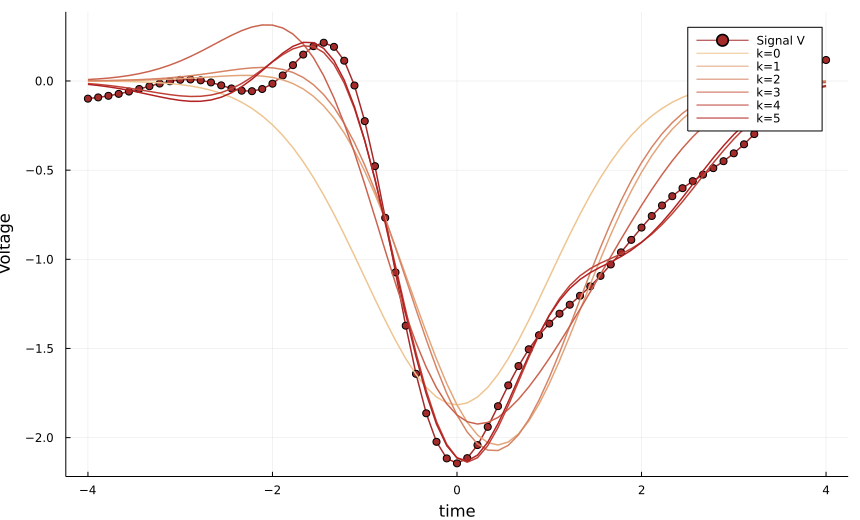

In [18]:
plot_all(n, xx_ekg, yy_ekgV, appsV, colorsV, "Signal V", :brown)

#### Zadanie 3
Pokazać, że same wielomiany nie są ortogonalne, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

In [19]:
function fun_no_wages(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k
    
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

fun_no_wages (generic function with 2 methods)

In [20]:
function fun_wages(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

fun_wages (generic function with 2 methods)

In [21]:
function hermit(n, xs)
    hermits = []
    hermits_w = []
    for i=1:n
        push!(hermits, fun_no_wages(i-1, xs, true))
        push!(hermits_w, fun_wages(i-1, xs, true))
    end
    return hermits, hermits_w
end

hermit (generic function with 1 method)

In [22]:
n = 6
xs = -10:0.1:10
hermits, hermits_w = hermit(n, xs)

classic_dot = Array{Float64, 2}(undef, n, n)
wages_dot = Array{Float64, 2}(undef, n, n)

for (i, f_i) in enumerate(hermits) 
    for (j, f_j) in enumerate(hermits)
        classic_dot[i,j] = dot(f_i, f_j)
    end
end

for (i, f_i) in enumerate(hermits_w) 
    for (j, f_j) in enumerate(hermits_w)
        wages_dot[i,j] = dot(f_i, f_j)
    end
end

In [23]:
classic_dot

6×6 Matrix{Float64}:
  1.0           1.58078e-17   0.740387     …   0.593089     -1.78964e-17
  1.58078e-17   1.0          -9.78283e-18      1.92419e-17   0.813187
  0.740387     -9.78283e-18   1.0              0.956222     -1.11044e-17
 -4.25619e-18   0.912785      1.66195e-17     -1.25564e-17   0.973494
  0.593089      1.92419e-17   0.956222         1.0          -4.44065e-17
 -1.78964e-17   0.813187     -1.11044e-17  …  -4.44065e-17   1.0

In [24]:
wages_dot

6×6 Matrix{Float64}:
  1.0           7.80626e-18   1.39323e-36  …   6.63501e-35  -6.93889e-18
  7.80626e-18   1.0           3.46945e-18      8.65093e-34  -2.77556e-17
  1.39323e-36   3.46945e-18   1.0              7.929e-33    -6.93889e-18
 -3.46945e-18   6.93889e-17  -2.08167e-17      6.83047e-18   6.93889e-17
  6.63501e-35   8.65093e-34   7.929e-33        1.0          -1.38778e-17
 -6.93889e-18  -2.77556e-17  -6.93889e-18  …  -1.38778e-17   1.0

#### Zadanie 5
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

In [25]:
mse(y1, y2) = mean((y1-y2).^2)

mse (generic function with 1 method)

In [26]:
function all_mes(n, yy1, yy2)
    allmes = []
    for i=1:n
        push!(allmes, mse(yy1, apps_complete(i, yy2)))
    end    
    return allmes
end

all_mes (generic function with 1 method)

In [27]:
n = 11
# dla sygnału N
fN = fs(n, xx_ekg)
cN = cs(n, fN, yy_ekgN)
appsN = apps(n, cN, fN)

# dla sygnału V

fV = fs(n, xx_ekg)
cV = cs(n, fV, yy_ekgV)
appsV = apps(n, cV, fV)

allmesN = all_mes(n, yy_ekgN, appsN)
allmesV = all_mes(n, yy_ekgV, appsV)

11-element Vector{Any}:
 0.1675380359890898
 0.062058793472696924
 0.060652867414550976
 0.04008843785445875
 0.006383463796395047
 0.006081291954185556
 0.005854964251436245
 0.003471290140341323
 0.0032469317824282587
 0.0005892396935529144
 0.0005655614018863208

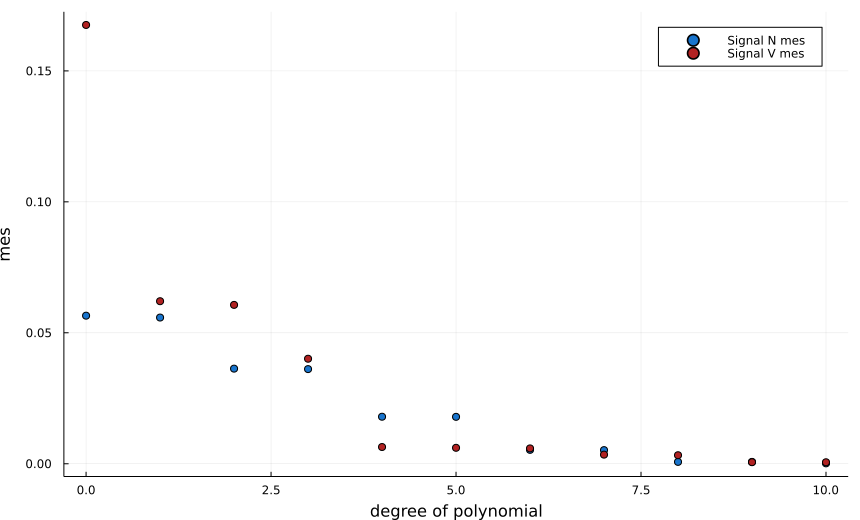

In [28]:
scatter(0:n-1, allmesN, size=(860, 520), color=:dodgerblue3, label="Signal N mes", xlabel = "degree of polynomial", ylabel = "mes")
scatter!(0:n-1, allmesV, color=:firebrick, label="Signal V mes")